## Import data

In [1]:
london <- read.csv('london_weekday_cleaned_final.csv')

In [3]:
head(london)

X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1,297.9844,Private room,False,True,2,True,1,0,10,99,1,2.198946,0.3792620,553.8917,38.50163,961.4721,17.215961,-0.09683,51.50343
2,336.7906,Private room,False,True,2,False,1,0,10,96,1,2.322958,0.4531776,428.2878,29.77076,959.0428,17.172462,-0.10554,51.52407
3,226.7222,Private room,False,True,2,True,1,0,10,99,1,5.707825,1.7239771,195.6947,13.60296,452.2325,8.097600,-0.16575,51.46292
4,256.3560,Private room,False,True,3,False,0,0,9,98,1,3.257945,0.8254172,329.4771,22.90232,735.3273,13.166649,-0.12055,51.53728
5,239.8928,Private room,False,True,2,False,0,0,10,100,1,5.085730,1.8062181,226.7250,15.75990,486.7371,8.715433,-0.17241,51.47222
6,324.0904,Private room,False,True,2,False,0,0,10,100,1,4.595055,0.2968787,283.4426,19.70241,682.1867,12.215122,-0.19359,51.51061


In [5]:
keep <- c("realSum", "host_is_superhost")
london_data = london[,names(london) %in% keep]
head(london_data)

realSum,host_is_superhost
297.9844,True
336.7906,False
226.7222,True
256.3560,False
239.8928,False
324.0904,False


### Filter data: Superhost vs Non superhost

In [7]:
london_superhost <- subset(london_data, host_is_superhost=='True')
london_notsuperhost <- subset(london_data, host_is_superhost=='False')
head(london_superhost)
head(london_notsuperhost)

,realSum,host_is_superhost
1,297.9844,True
3,226.7222,True
10,285.0490,True
13,207.4367,True
15,206.0255,True
16,213.5516,True


,realSum,host_is_superhost
2,336.7906,False
4,256.3560,False
5,239.8928,False
6,324.0904,False
7,155.6951,False
8,129.3539,False


### Generate scatter and box plots

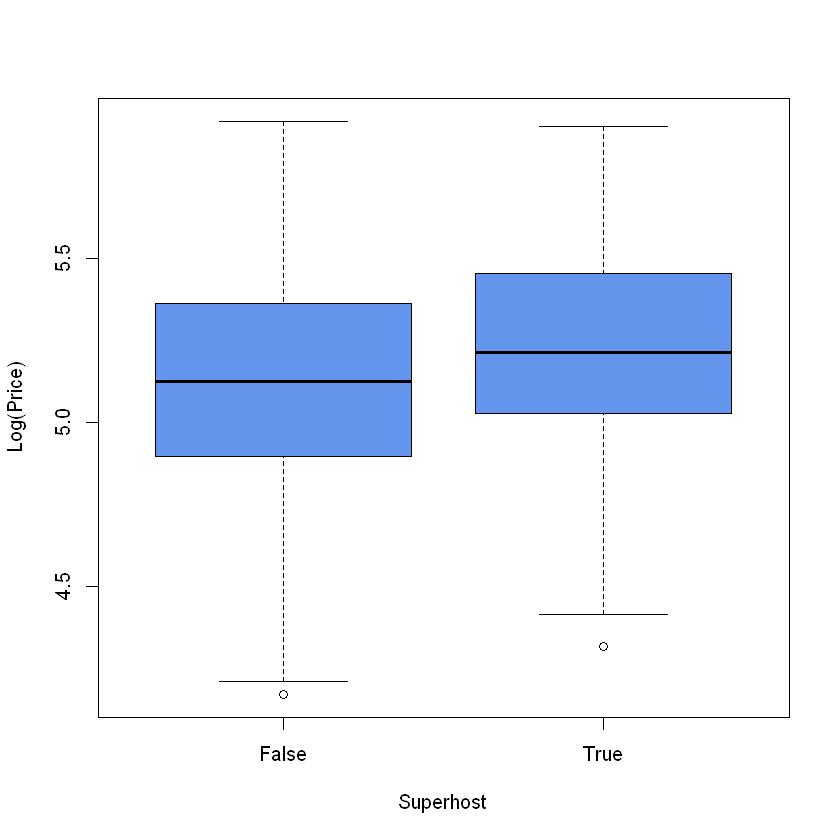

In [10]:
par(mfrow=c(1,1))
boxplot(log(london_data$realSum)~london_data$host_is_superhost, col = "cornflowerblue", xlab = "Superhost", ylab = "Log(Price)" )

### Test variances

In [11]:
var.test(log(london_data$realSum)~london_data$host_is_superhost)


	F test to compare two variances

data:  log(london_data$realSum) by london_data$host_is_superhost
F = 1.0797, num df = 2026, denom df = 453, p-value = 0.3083
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9315838 1.2430031
sample estimates:
ratio of variances 
          1.079688 


At the 0.05 significance level, we do not have enough evidence to reject H0 as the p-value of 0.3083 > 0.05, hence, the variances are taken to be the same

### Test means

In [14]:
t.test(log(london_data$realSum)~london_data$host_is_superhost, var.equal=TRUE)


	Two Sample t-test

data:  log(london_data$realSum) by london_data$host_is_superhost
t = -5.3435, df = 2479, p-value = 9.946e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.12419601 -0.05751385
sample estimates:
mean in group False  mean in group True 
           5.138328            5.229183 


As p-value is extremely small and below 0.05, we can reject H0 that the difference between the means is the same and conclude that the difference between the mean price of Airbnb differs, based on whether the host is a superhost or not